## James Grant Robinett
## JGR2722
## COE 379L

In [31]:
# Read breat_cancer.csv to cancer variable
import pandas as pd
import numpy as np

In [2]:
cancer = pd.read_csv('breast_cancer.csv')

In [3]:
# Give shape and size of the dataframe
print(cancer.shape)
print(cancer.size)

(286, 10)
2860


In [4]:
# Get info on dataset
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [5]:
# Search for missing values
print(cancer.isnull().sum())

class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64


In [6]:
# Check for duplicates
print(cancer.duplicated().sum())

14


In [7]:
# Remove duplicates
cancer = cancer.drop_duplicates()

In [8]:
print(cancer.duplicated().sum())

0


In [9]:
# Get the first 5 rows
print(cancer.head())

                  class    age menopause tumor-size inv-nodes node-caps  \
0  no-recurrence-events  30-39   premeno      30-34       0-2        no   
1  no-recurrence-events  40-49   premeno      20-24       0-2        no   
2  no-recurrence-events  40-49   premeno      20-24       0-2        no   
3  no-recurrence-events  60-69      ge40      15-19       0-2        no   
4  no-recurrence-events  40-49   premeno        0-4       0-2        no   

   deg-malig breast breast-quad irradiat  
0          3   left    left_low       no  
1          2  right    right_up       no  
2          2   left    left_low       no  
3          2  right     left_up       no  
4          2  right   right_low       no  


In [10]:
# As we can see here, there are certain columns we want to convert from categorical to numerical
# Let's start with the age column
# Since each age row is a range from 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99, we can convert them to the average of the range
# For example, 10-19 will be converted to 15, 20-29 will be converted to 25 and so on

# Convert age to numerical
cancer['age'] = cancer['age'].map(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1]))/2)
# In the step above, lambda is used to apply the function to each row of the column
# The function splits the age range into two and adds the two numbers together and divides by 2

print(cancer.head())

                  class   age menopause tumor-size inv-nodes node-caps  \
0  no-recurrence-events  34.5   premeno      30-34       0-2        no   
1  no-recurrence-events  44.5   premeno      20-24       0-2        no   
2  no-recurrence-events  44.5   premeno      20-24       0-2        no   
3  no-recurrence-events  64.5      ge40      15-19       0-2        no   
4  no-recurrence-events  44.5   premeno        0-4       0-2        no   

   deg-malig breast breast-quad irradiat  
0          3   left    left_low       no  
1          2  right    right_up       no  
2          2   left    left_low       no  
3          2  right     left_up       no  
4          2  right   right_low       no  


In [11]:
# Now, lets do the same thing to the tumor-size column and the inv-nodes column
cancer['tumor-size'] = cancer['tumor-size'].map(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1]))/2)
cancer['inv-nodes'] = cancer['inv-nodes'].map(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1]))/2)

In [12]:
print(cancer.head())
cancer.info()

                  class   age menopause  tumor-size  inv-nodes node-caps  \
0  no-recurrence-events  34.5   premeno        32.0        1.0        no   
1  no-recurrence-events  44.5   premeno        22.0        1.0        no   
2  no-recurrence-events  44.5   premeno        22.0        1.0        no   
3  no-recurrence-events  64.5      ge40        17.0        1.0        no   
4  no-recurrence-events  44.5   premeno         2.0        1.0        no   

   deg-malig breast breast-quad irradiat  
0          3   left    left_low       no  
1          2  right    right_up       no  
2          2   left    left_low       no  
3          2  right     left_up       no  
4          2  right   right_low       no  
<class 'pandas.core.frame.DataFrame'>
Index: 272 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   class        272 non-null    object 
 1   age          272 non-null    float64
 2   menopause   

Great, the age, tumor-size and inv-nodes columns are numeric data types and singular numeric values!

Now, we need to decide what else we would like to convert, or what should be used in One Hot Encoding.

In my opinion, the first step will be to check how many unique values each of these columns we could possibly encode has.

In [13]:
# Get unique values for class, menopause, node-caps, deg-malig, breast, breast-quad, irradiat

print(cancer['class'].unique())
print(cancer['menopause'].unique())
print(cancer['node-caps'].unique())
print(cancer['deg-malig'].unique())
print(cancer['breast'].unique())
print(cancer['breast-quad'].unique())
print(cancer['irradiat'].unique())

['no-recurrence-events' 'recurrence-events']
['premeno' 'ge40' 'lt40']
['no' 'yes' '?']
[3 2 1]
['left' 'right']
['left_low' 'right_up' 'left_up' 'right_low' 'central' '?']
['no' 'yes']


Well, we got a lot of information from this! First, no column here is too big to hot encode, so we should be ok to encode these columns.

However, there are missing values in the node-caps and breat-quad columns we need to address first.

In [14]:
# Return rows that have a ? in the node-caps column
print(cancer[cancer['node-caps'] == '?'])

                    class   age menopause  tumor-size  inv-nodes node-caps  \
145  no-recurrence-events  44.5   premeno        27.0        1.0         ?   
163  no-recurrence-events  64.5      ge40        27.0        4.0         ?   
164  no-recurrence-events  64.5      ge40        27.0        4.0         ?   
183  no-recurrence-events  54.5      ge40        32.0       10.0         ?   
184  no-recurrence-events  54.5      ge40        32.0       10.0         ?   
233     recurrence-events  74.5      ge40        17.0       10.0         ?   
263     recurrence-events  54.5      lt40        22.0        1.0         ?   
264     recurrence-events  54.5      lt40        22.0        1.0         ?   

     deg-malig breast breast-quad irradiat  
145          2   left   right_low      yes  
163          1  right     left_up      yes  
164          1  right    left_low      yes  
183          3   left     left_up      yes  
184          3   left    left_low      yes  
233          1   left    le

In [15]:
# Return rows that have a ? in the breast-quad column
print(cancer[cancer['breast-quad'] == '?'])

                 class   age menopause  tumor-size  inv-nodes node-caps  \
206  recurrence-events  54.5      ge40        32.0        1.0        no   

     deg-malig breast breast-quad irradiat  
206          3   left           ?       no  


Looks like there are 9 total columns that have missing values. I could try to fill in these values, but it is extremely difficult since it is categorical data. I have decided to drop these columns instead.

In [16]:
# Drop the rows that have a ? in the node-caps column
cancer = cancer[cancer['node-caps'] != '?']

# Drop the rows that have a ? in the breast-quad column
cancer = cancer[cancer['breast-quad'] != '?']

In [17]:
# Check for any ? in the dataset
print(cancer[cancer == '?'].sum())

class            0
age            0.0
menopause        0
tumor-size     0.0
inv-nodes      0.0
node-caps        0
deg-malig      0.0
breast           0
breast-quad      0
irradiat         0
dtype: object


## *Now, let's look at some univariate and bivariate visualizations.*

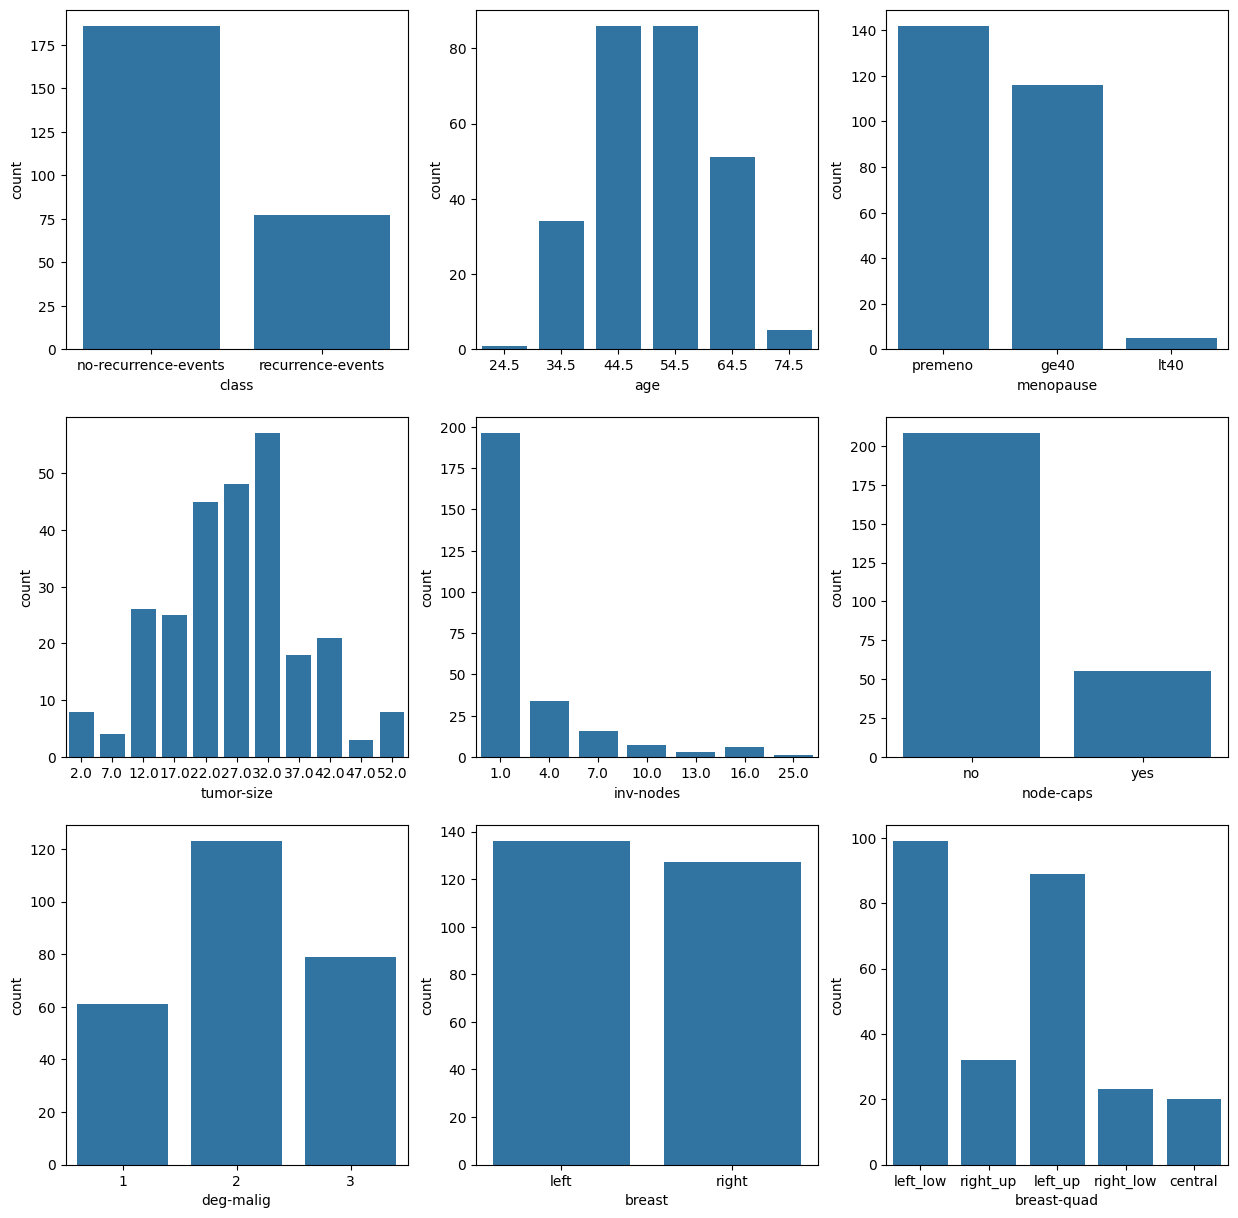

In [18]:
# univariate plot grid for each categorical column
import matplotlib.pyplot as plt
import seaborn as sns

f, axes = plt.subplots(3, 3, figsize=(15, 15))

# Plot a simple histogram
sns.countplot(x="class", data=cancer, ax=axes[0, 0])
sns.countplot(x="age", data=cancer, ax=axes[0, 1])
sns.countplot(x="menopause", data=cancer, ax=axes[0, 2])
sns.countplot(x="tumor-size", data=cancer, ax=axes[1, 0])
sns.countplot(x="inv-nodes", data=cancer, ax=axes[1, 1])
sns.countplot(x="node-caps", data=cancer, ax=axes[1, 2])
sns.countplot(x="deg-malig", data=cancer, ax=axes[2, 0])
sns.countplot(x="breast", data=cancer, ax=axes[2, 1])
sns.countplot(x="breast-quad", data=cancer, ax=axes[2, 2])

plt.show()

### *Univariate Analysis*

* Class: The number of cases with no recurrence events is significantly higher than those with recurrence events. This means we need to do some stratification to make sure we have a good balance of our response variable.
* Age: The age distribution appears skewed towards the younger age groups, with a peak around the mid-50s. This shows that the dataset mainly consists of middle-aged patients. 
* Menopause: The 'premeno' category is the most represented menopause status, followed by 'ge40', and a smaller number of 'lt40'. This distribution aligns with typical menopause age ranges, because 'premeno' would likely include patients younger than 40 in the pre-menopause phase.
* Tumor Size: The tumor size has a right-skewed distribution, with smaller tumor sizes being more common.
* Inv-Nodes: The majority of cases have fewer invasive nodes, which means that most patients in the dataset are in an earlier stage of cancer, and the spread to lymph nodes is less common at this stage.
* Node-Caps: A clear majority of the cases have 'no' node caps, which shows a lower degree of spread/aggressive cancer in these patients.
* Deg-Malign: There's a relatively balanced distribution across different degrees of malignancy. However, degree '2' seems to have a slightly higher occurrence.
* Breast: More cases pertain to the left breast than the right. This could be a random occurrence rather than a significant pattern.
* Breast-Quad: The distribution of cancer across breast quadrants shows some differences, with the left_low quadrant having the highest count, followed by left_up. The central and right_low quadrants are less represented.

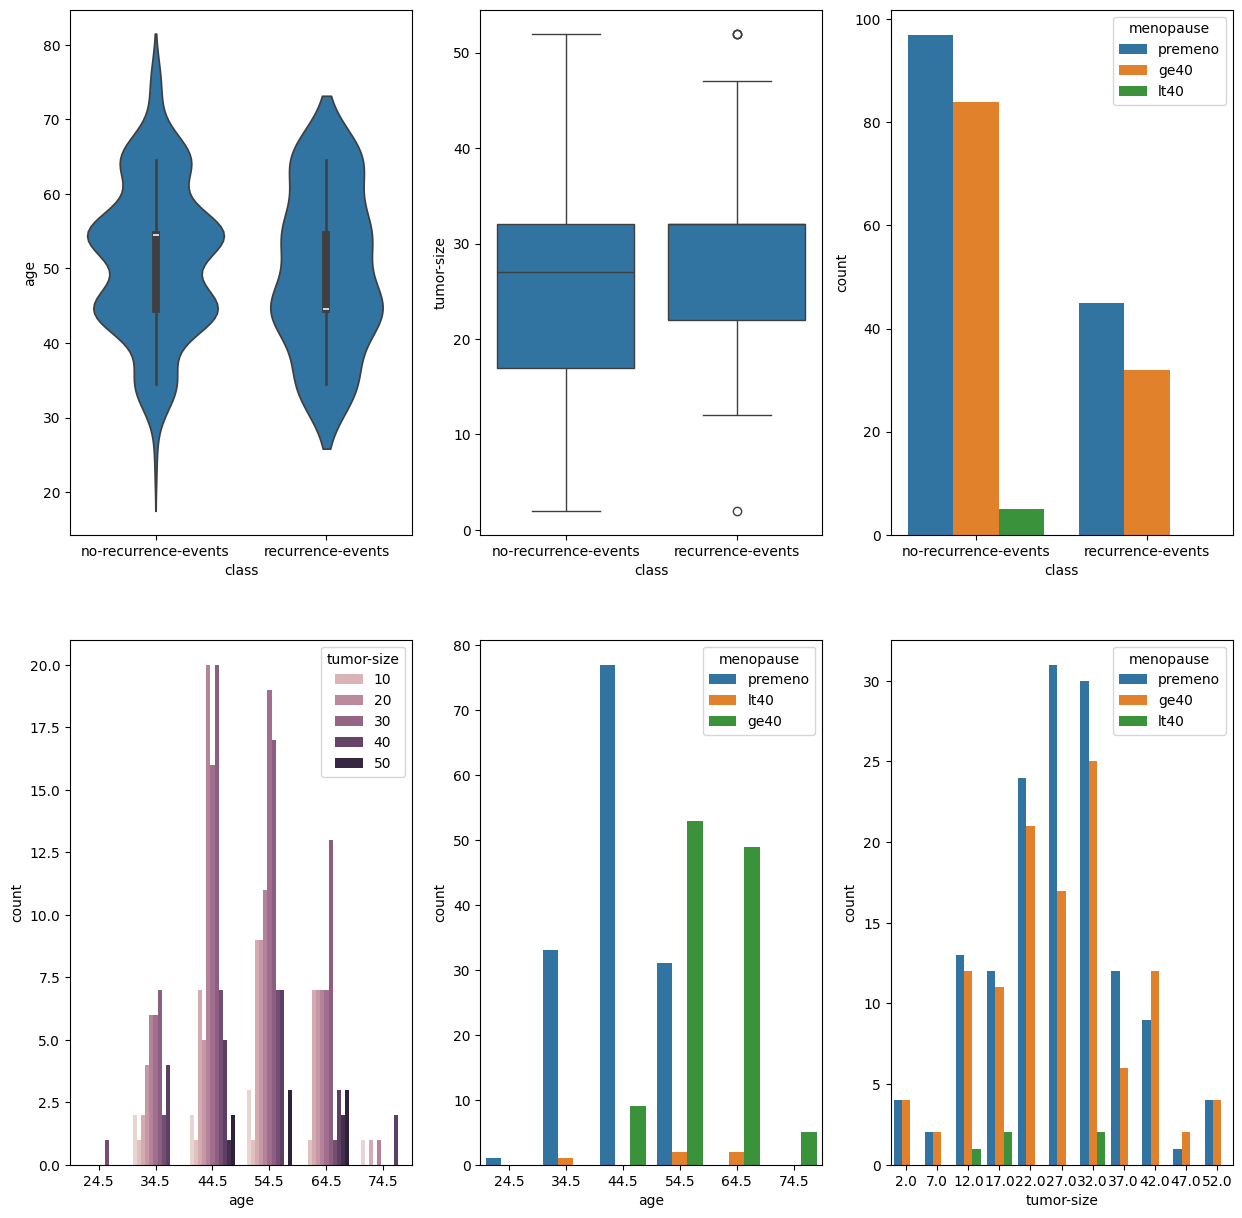

In [19]:
# Figure
f, axes = plt.subplots(2, 3, figsize=(15, 15))

# class vs age violin plot
sns.violinplot(x="class", y="age", data=cancer, ax=axes[0, 0])
# class vs tumor-size box plot
sns.boxplot(x="class", y="tumor-size", data=cancer, ax=axes[0, 1])
# Class vs menopause count plot
sns.countplot(x="class", hue="menopause", data=cancer, ax=axes[0, 2])
# Age vs tumor-size count plot
sns.countplot(x="age", hue="tumor-size", data=cancer, ax=axes[1, 0])
# age vs menopause count plot
sns.countplot(x="age", hue="menopause", data=cancer, ax=axes[1, 1])
# tumor-size vs menopause count plot
sns.countplot(x="tumor-size", hue="menopause", data=cancer, ax=axes[1, 2])

plt.show()

### *Bivariate Analysis*

* Class vs. Age: We can see that no-recurrence has a longer tail on both the upper and lower bounds than the recurrence category. The violin ranges for both classes are about the same, so this suggests that while recurrence and non-recurrence are detected equaly around the same age, non-recurrence occurs more often in younger and older patients.
* Class vs. Tumor Size: As we can see, the box plot shows that the median classification for tumor size based on class is about the same. However, like the previous visualization, no-recurrence has a higher and lower bound, and generally has a lower quartile, suggesting that non-recurrence tends to have smaller tumors than the recurrence class.
* Class vs. Menopause: The proportion of premenopausal patients seems larger within the no-recurrence class compared to the recurrence class, suggesting a potential association between menopause status and recurrence events.
* Age vs. Tumor Size: When examining age against tumor size, we notice that younger age groups (e.g., 24.5-34.5) tend to have smaller tumor sizes, while as age increases, so does the variation in tumor size.
* Age vs. Menopause: The taller bars in younger ages for 'premeno' and the shift towards 'ge40' as age increases are consistent with the expected age of onset for menopause. 
* Tumor Size vs. Menopause: The plots show that most tumor sizes are represented across different menopause statuses, suggesting that tumor size is not strongly dependent on menopause status.

### We're all good! Ready for hot encoding!

In [20]:
print(cancer.shape)
print(cancer.size)

(263, 10)
2630


In [21]:
# Encoding using one hot encoder
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Encode the menopause column
menopause_encoded = encoder.fit_transform(cancer[['menopause']])

# Reset index before concatenation to ensure alignment
cancer = cancer.drop('menopause', axis=1).reset_index(drop=True)
menopause_encoded_df = pd.DataFrame(menopause_encoded, columns=encoder.get_feature_names_out(['menopause'])).reset_index(drop=True)

# Concatenate along the columns (axis=1)
cancer = pd.concat([cancer, menopause_encoded_df], axis=1)

# Encode the node-caps column
node_caps_encoded = encoder.fit_transform(cancer[['node-caps']])

# Reset index before concatenation to ensure alignment
cancer = cancer.drop('node-caps', axis=1).reset_index(drop=True)
node_caps_encoded_df = pd.DataFrame(node_caps_encoded, columns=encoder.get_feature_names_out(['node-caps'])).reset_index(drop=True)

# Concatenate along the columns (axis=1)
cancer = pd.concat([cancer, node_caps_encoded_df], axis=1)

# Encode the deg-malig column
deg_malig_encoded = encoder.fit_transform(cancer[['deg-malig']])

# Reset index before concatenation to ensure alignment
cancer = cancer.drop('deg-malig', axis=1).reset_index(drop=True)
deg_malig_encoded_df = pd.DataFrame(deg_malig_encoded, columns=encoder.get_feature_names_out(['deg-malig'])).reset_index(drop=True)

# Concatenate along the columns (axis=1)
cancer = pd.concat([cancer, deg_malig_encoded_df], axis=1)

# Encode the breast column
breast_encoded = encoder.fit_transform(cancer[['breast']])

# Reset index before concatenation to ensure alignment
cancer = cancer.drop('breast', axis=1).reset_index(drop=True)
breast_encoded_df = pd.DataFrame(breast_encoded, columns=encoder.get_feature_names_out(['breast'])).reset_index(drop=True)

# Concatenate along the columns (axis=1)
cancer = pd.concat([cancer, breast_encoded_df], axis=1)

# Encode the breast-quad column
breast_quad_encoded = encoder.fit_transform(cancer[['breast-quad']])

# Reset index before concatenation to ensure alignment
cancer = cancer.drop('breast-quad', axis=1).reset_index(drop=True)
breast_quad_encoded_df = pd.DataFrame(breast_quad_encoded, columns=encoder.get_feature_names_out(['breast-quad'])).reset_index(drop=True)

# Concatenate along the columns (axis=1)
cancer = pd.concat([cancer, breast_quad_encoded_df], axis=1)

# Encode the irradiat column
irradiat_encoded = encoder.fit_transform(cancer[['irradiat']])

# Reset index before concatenation to ensure alignment
cancer = cancer.drop('irradiat', axis=1).reset_index(drop=True)
irradiat_encoded_df = pd.DataFrame(irradiat_encoded, columns=encoder.get_feature_names_out(['irradiat'])).reset_index(drop=True)

# Concatenate along the columns (axis=1)
cancer = pd.concat([cancer, irradiat_encoded_df], axis=1)

# Show the result
print(cancer.head())

                  class   age  tumor-size  inv-nodes  menopause_ge40  \
0  no-recurrence-events  34.5        32.0        1.0             0.0   
1  no-recurrence-events  44.5        22.0        1.0             0.0   
2  no-recurrence-events  44.5        22.0        1.0             0.0   
3  no-recurrence-events  64.5        17.0        1.0             1.0   
4  no-recurrence-events  44.5         2.0        1.0             0.0   

   menopause_lt40  menopause_premeno  node-caps_no  node-caps_yes  \
0             0.0                1.0           1.0            0.0   
1             0.0                1.0           1.0            0.0   
2             0.0                1.0           1.0            0.0   
3             0.0                0.0           1.0            0.0   
4             0.0                1.0           1.0            0.0   

   deg-malig_1  ...  deg-malig_3  breast_left  breast_right  \
0          0.0  ...          1.0          1.0           0.0   
1          0.0  ...       

In [22]:
# List all columns
print(cancer.columns)

Index(['class', 'age', 'tumor-size', 'inv-nodes', 'menopause_ge40',
       'menopause_lt40', 'menopause_premeno', 'node-caps_no', 'node-caps_yes',
       'deg-malig_1', 'deg-malig_2', 'deg-malig_3', 'breast_left',
       'breast_right', 'breast-quad_central', 'breast-quad_left_low',
       'breast-quad_left_up', 'breast-quad_right_low', 'breast-quad_right_up',
       'irradiat_no', 'irradiat_yes'],
      dtype='object')


In [23]:
# Check for NaN values
print(cancer.isnull().sum())

class                    0
age                      0
tumor-size               0
inv-nodes                0
menopause_ge40           0
menopause_lt40           0
menopause_premeno        0
node-caps_no             0
node-caps_yes            0
deg-malig_1              0
deg-malig_2              0
deg-malig_3              0
breast_left              0
breast_right             0
breast-quad_central      0
breast-quad_left_low     0
breast-quad_left_up      0
breast-quad_right_low    0
breast-quad_right_up     0
irradiat_no              0
irradiat_yes             0
dtype: int64


In [24]:
print(cancer.shape)

(263, 21)


# Now, we can move on to part 2, fitting the different models!

In [25]:
from sklearn.model_selection import train_test_split

# Define the target variable and the independent variables
y = cancer['class']
X = cancer.drop('class', axis=1)

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

Train Test Split complete! We are using the class variable as our dependent variable, and everything else as our predictors. Additionally, we train on an 80/20 split, while keeping roughly the proportion of each class of dependent variable using stratify.

### Now, let's implement multi-model classifications

In [26]:
from sklearn.base import BaseEstimator
from sklearn.neighbors import KNeighborsClassifier

class MultiModelClassifier(BaseEstimator):
    """
    A custom Estimator class that can be constructed with different model types.
    For details on implementing custom Estimators,
    see: https://scikit-learn.org/stable/developers/develop.html
    """

    def __init__(self, model=KNeighborsClassifier()):
        """
        A custom estimator parameterized by the model.
        Pass the result of an estimator constructor for `model`. By default,
        it uses the KNeighborsClassifier().
        """
        self.model = model

    def fit(self, X, y=None, **kwargs):
        self.model.fit(X, y)
        return self

    def predict(self, X, y=None):
        return self.model.predict(X)

    def predict_proba(self, X):
        return self.model.predict_proba(X)

    def score(self, X, y):
        return self.model.score(X, y)

In [27]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Make a Pipeline with multi model classifier
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('mmc', MultiModelClassifier()),
])

# Define param grid we are searching through
param_grids = [
    {
        'mmc__model': [KNeighborsClassifier()],
        'mmc__model__n_neighbors': np.arange(1, 100)
    },
    {
        'mmc__model': [RandomForestClassifier()],
        'mmc__model__n_estimators': np.arange(20, 150, 3)
    },
    {
        'mmc__model': [DecisionTreeClassifier()],
        'mmc__model__max_depth': np.arange(1, 10)
    },
    {
        'mmc__model': [LogisticRegression()],
        'mmc__model__C': np.logspace(-3, 3, 7)
    }
]


In [28]:
from sklearn.model_selection import GridSearchCV

# Saving best params and models in a dictionary
best_models = {}

# Iterate over each parameter grid
for params in param_grids:
    # Initialize GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid=params, n_jobs=-1, cv=5)
    
    # Fit the grid search
    grid_search.fit(X_train, y_train)
    
    # Get the best model
    best_model = grid_search.best_estimator_
    
    # Get the model name
    model_name = best_model.named_steps['mmc'].model.__class__.__name__
    
    # Store the best model
    best_models[model_name] = best_model
    
    # Print the best parameters
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

Best parameters for KNeighborsClassifier: {'mmc__model': KNeighborsClassifier(), 'mmc__model__n_neighbors': 7}
Best parameters for RandomForestClassifier: {'mmc__model': RandomForestClassifier(), 'mmc__model__n_estimators': 140}
Best parameters for DecisionTreeClassifier: {'mmc__model': DecisionTreeClassifier(), 'mmc__model__max_depth': 2}
Best parameters for LogisticRegression: {'mmc__model': LogisticRegression(), 'mmc__model__C': 0.1}


In [29]:
from sklearn.metrics import classification_report

# Now we can evaluate these best models with the test set!
for model_name, model in best_models.items():
    print(f"Evaluating model: {model_name}")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

Evaluating model: KNeighborsClassifier
                      precision    recall  f1-score   support

no-recurrence-events       0.70      0.89      0.79        37
   recurrence-events       0.33      0.12      0.18        16

            accuracy                           0.66        53
           macro avg       0.52      0.51      0.48        53
        weighted avg       0.59      0.66      0.60        53

Evaluating model: RandomForestClassifier
                      precision    recall  f1-score   support

no-recurrence-events       0.72      0.84      0.78        37
   recurrence-events       0.40      0.25      0.31        16

            accuracy                           0.66        53
           macro avg       0.56      0.54      0.54        53
        weighted avg       0.62      0.66      0.63        53

Evaluating model: DecisionTreeClassifier
                      precision    recall  f1-score   support

no-recurrence-events       0.71      0.86      0.78        37
   r

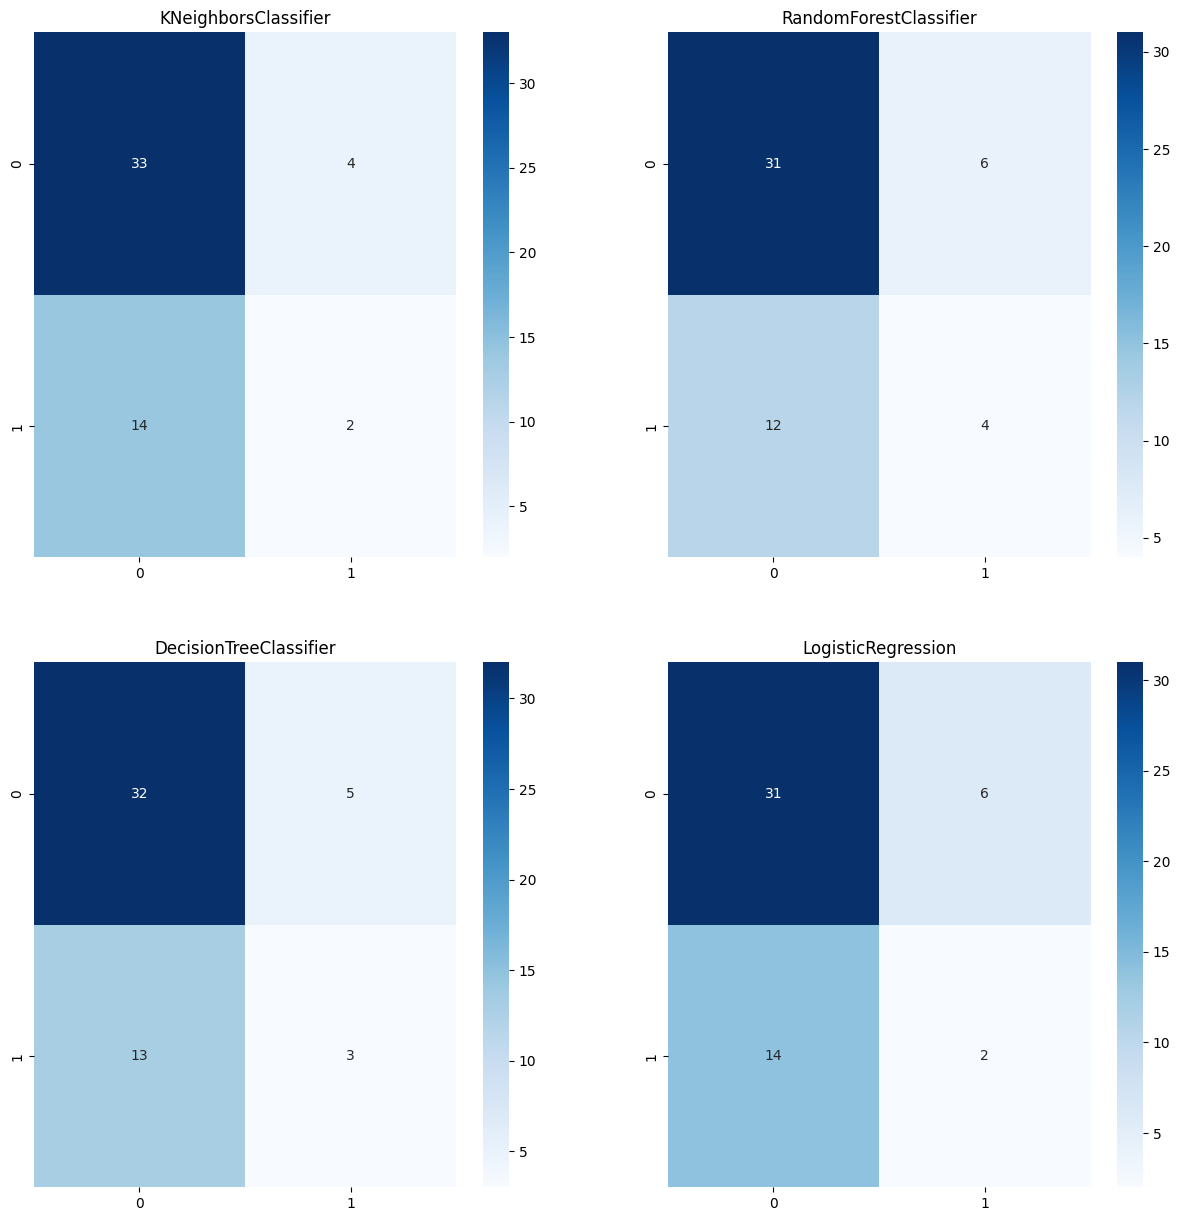

In [30]:
# Model Performance visualization
from sklearn.metrics import confusion_matrix

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(15, 15))

# KNeighborsClassifier
y_pred = best_models['KNeighborsClassifier'].predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g', ax=axes[0, 0])
axes[0, 0].set_title('KNeighborsClassifier')

# RandomForestClassifier
y_pred = best_models['RandomForestClassifier'].predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g', ax=axes[0, 1])
axes[0, 1].set_title('RandomForestClassifier')

# DecisionTreeClassifier
y_pred = best_models['DecisionTreeClassifier'].predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g', ax=axes[1, 0])
axes[1, 0].set_title('DecisionTreeClassifier')

# LogisticRegression
y_pred = best_models['LogisticRegression'].predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g', ax=axes[1, 1])
axes[1, 1].set_title('LogisticRegression')

plt.show()

## **The models were trained!**

### The main metrics we get from our models are precision, recall, f1-score and accuracy. All of these metrics can be useful in many situations, but for the context of medical diagnosis of cancer, *recall* will be the most important metric to look at in our model's performance. This is because the cost of a false negative (failing to identify a patient with disease recurrence) could be life-threatening for the patient. We would much rather capture as many positive cases as possible, even at the expense of making some false positive errors. False positives can be corrected, but false negatives are a missed opportunity for early care in cancer treatment.

### The DecisionTreeClassifier and RandomForestClassifier have the highest recall for the 'recurrence-events' class. Even though their accuracy and F1-score are not very high, in this particular medical application, their higher recall for the positive class might make them more valuable. We do need to be careful about high recall and low precision, because that would lead to too many false positives being made. In that context, RandomForestClassifier would beat out DecisionTreeClassifier by a little, with a precision of 0.40 vs 0.38 for 'recurrence-events'.